# Importing required Libraries and datasets

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

C:\Users\RAMNARESH\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
train =pd.read_csv('Titanic.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA and Data Preparation

In [8]:
## Checking the dataset for completeness

train.info()

## Remove Cabin
## Substitute missing Age
## Remove column with missing Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
## Creating the first letter of ticket as a variable

train['Ticket_First'] = train['Ticket'].apply(lambda x:x.split()[0][:1])

pd.value_counts(train['Ticket_First'])

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_First, dtype: int64

In [10]:
## Extracting the salutation from name as a variable

train['Salute'] = train['Name'].apply(lambda x:x.split()[1])

In [11]:
pd.value_counts(train['Salute']).head()

Mr.        502
Miss.      179
Mrs.       121
Master.     40
Dr.          7
Name: Salute, dtype: int64

In [12]:
## Grouping the minor salutations as others

def Salute_group(col):
    
    if col[0] in ['Mr.', 'Miss.', 'Mrs.', 'Master.']:
        return col[0]
    else:
        return 'Others'

In [13]:
train['Salute_Grp'] = train[['Salute']].apply(Salute_group, axis =1)

<Axes: xlabel='Salute_Grp', ylabel='count'>

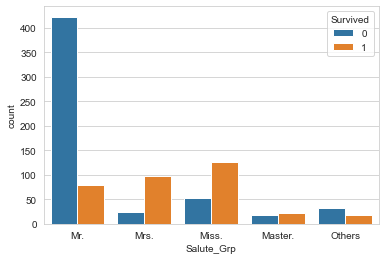

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Salute_Grp', data = train, hue = 'Survived')

<Axes: >

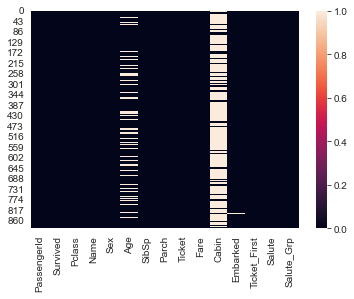

In [17]:
##Missing Values

sns.heatmap(train.isnull())

<Axes: xlabel='Sex', ylabel='Age'>

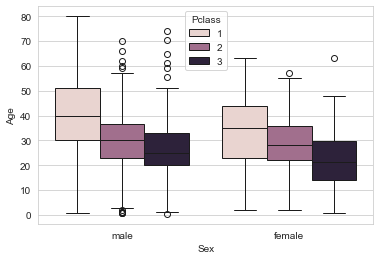

In [18]:
# Treat Age

# Substitute missing values with medians by Sex X Pclass
sns.boxplot (x='Sex', y='Age', data = train, hue = 'Pclass')


In [19]:
# Calculating medians

PclassXSex_med = train[['Sex','Age','Pclass']].groupby(['Sex','Pclass']).median()

In [20]:
# Defining a function to impute median (using median since the data is skewed) for each PclassXSex.

## MUCH MORE EFFICIENT WAY TO WRITING FUNCTION THAN BEFORE ##

def age_PclassSex(cols):
    age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(age) == True:
        return PclassXSex_med.loc[Sex].loc[Pclass][0]
    else:
        return age

In [21]:
train['Age_PclXSex'] = train[['Age', 'Pclass', 'Sex']].apply(age_PclassSex, axis = 1)

In [22]:
# Removing the unneeded and NA-dominated columns

train.drop(['Age', 'Cabin'], axis =1 , inplace = True)

In [23]:
# Drop the na rows

train.dropna(inplace = True)

<Axes: >

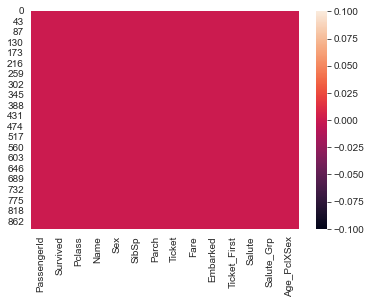

In [24]:
# Check if all the null values are gone

sns.heatmap(pd.isnull(train))

In [25]:
## Now creating dummy variables for Sex and Embarked


Sex_Dumm = pd.get_dummies(train['Sex'], drop_first = True)
Embarked_Dumm = pd.get_dummies(train['Embarked'], drop_first = True)
Ticket_First = pd.get_dummies(train['Ticket_First'], drop_first = True, prefix = 'Ticket')
Salute_Group = pd.get_dummies(train['Salute_Grp'], drop_first = True)

In [26]:
train = pd.concat([train, Sex_Dumm, Embarked_Dumm, Ticket_First, Salute_Group], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,...,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Miss.,Mr.,Mrs.,Others
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,...,0,0,0,0,0,0,0,1,0,0


# Creating base ML models

In [27]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Ticket_First', 'Salute', 'Salute_Grp',
       'Age_PclXSex', 'male', 'Q', 'S', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8', 'Ticket_9', 'Ticket_A',
       'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_P', 'Ticket_S', 'Ticket_W',
       'Miss.', 'Mr.', 'Mrs.', 'Others'],
      dtype='object')

In [28]:
## Creating test train dataset from 'train' dataframe only as we don't have the 'y' for test.

from sklearn.model_selection import train_test_split

y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(train[['Pclass', 'SibSp', 'Parch', 'Fare',
       'Age_PclXSex', 'male', 'Q', 'S', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8', 'Ticket_9', 'Ticket_A',
       'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_P', 'Ticket_S', 'Ticket_W',
        'Miss.', 'Mr.', 'Mrs.', 'Others']], y, test_size = 0.3, random_state = 143)

In [29]:
## Fitting into the base AdaBoost model for different n_estimators

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for n_est in [50,100,150,200]:
    
    ad_cl = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = n_est, random_state = 105)
    ad_cl.fit(X_train,y_train)
    pred = ad_cl.predict(X_test)
    print('No of estimators = ', n_est)
    print('Accuracy Score = ',accuracy_score(y_test, pred))
    print('\n')
    
## So, 150 seems to be the best no. of estimators with Accuracy Score of ~0.85

No of estimators =  50
Accuracy Score =  0.8314606741573034


No of estimators =  100
Accuracy Score =  0.8426966292134831


No of estimators =  150
Accuracy Score =  0.850187265917603


No of estimators =  200
Accuracy Score =  0.8352059925093633




In [30]:
## Fitting into the base Gradient boosting model

from sklearn.ensemble import GradientBoostingClassifier

for n_est in [20, 50,100,150,200]:
    
    gd_cl = GradientBoostingClassifier(n_estimators = n_est, random_state = 105)
    gd_cl.fit(X_train,y_train)
    pred = gd_cl.predict(X_test)
    print('No of estimators = ', n_est)
    print('Accuracy Score = ',accuracy_score(y_test, pred))
    print('\n')

## So, 100 seems to be the best no. of estimators with Accuracy Score of ~0.82 without tuning other parameters

No of estimators =  20
Accuracy Score =  0.8089887640449438


No of estimators =  50
Accuracy Score =  0.8014981273408239


No of estimators =  100
Accuracy Score =  0.8164794007490637


No of estimators =  150
Accuracy Score =  0.8164794007490637


No of estimators =  200
Accuracy Score =  0.8089887640449438




In [31]:
from xgboost import XGBClassifier

In [32]:
## Fitting into the base Xtreme Gradient boosting model

from xgboost import XGBClassifier

for n_est in [20, 50,100,150,200]:
    
    xgb_cl = XGBClassifier(n_estimators = n_est, random_state = 105)
    xgb_cl.fit(X_train,y_train)
    pred = xgb_cl.predict(X_test)
    print('No of estimators = ', n_est)
    print('Accuracy Score = ',accuracy_score(y_test, pred))
    print('\n')

## So, 100 seems to be the best no. of estimators with Accuracy Score of ~0.82 without tuning other parameters

No of estimators =  20
Accuracy Score =  0.8314606741573034


No of estimators =  50
Accuracy Score =  0.8314606741573034


No of estimators =  100
Accuracy Score =  0.8127340823970037


No of estimators =  150
Accuracy Score =  0.8052434456928839


No of estimators =  200
Accuracy Score =  0.8089887640449438




So, the best performance here is for AdaBoost classifier. We can try to tune the hyperparameters in Gradient Boosting and XGBoost to try and see which combination of parameters gives the best result. But for now, let us use the Adaboost for test predictions. 

# Preparing test data

In [35]:
## Prepare the test dataset in the same way

test = pd.read_csv('test.csv')

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test['Ticket_First'] = test['Ticket'].apply(lambda x:x.split()[0][:1])

test['Ticket_First'].unique()

array(['3', '2', '7', 'A', '6', 'W', 'S', 'P', 'C', '1', 'F', '4', '9',
       'L'], dtype=object)

In [38]:
test['Salute'] = test['Name'].apply(lambda x:x.split()[1])

In [39]:
test['Salute'] = test['Name'].apply(lambda x:x.split()[1])
def Salute_group(col):
    
    if col[0] in ['Mr.', 'Miss.', 'Mrs.', 'Master.']:
        return col[0]
    else:
        return 'Others'

In [40]:
test['Salute_Grp'] = test[['Salute']].apply(Salute_group, axis =1)

In [41]:

PclassXSex_med = test[['Sex','Age','Pclass']].groupby(['Sex','Pclass']).median()
PclassXSex_med

Age
Sex    Pclass      
female 1       41.0
       2       24.0
       3       22.0
male   1       42.0
       2       28.0
       3       24.0

In [42]:
test['Age_PclXSex'] = test[['Age', 'Pclass', 'Sex']].apply(age_PclassSex, axis = 1)

In [43]:
# Removing the unneeded and NA-dominated columns

test.drop(['Cabin', 'Age'], axis =1 , inplace = True)

In [44]:
Fare_med = test[['Pclass','Fare','Sex', 'Embarked']].groupby(['Pclass','Sex', 'Embarked']).agg(['count', 'mean'])

Fare_med

Fare            
                       count        mean
Pclass Sex    Embarked                  
1      female C           28  123.895682
              Q            1   90.000000
              S           21  105.737110
       male   C           28   96.251339
              S           29   55.634341
2      female C            4   30.040625
              S           26   25.884615
       male   C            7   14.451771
              Q            4   11.273950
              S           52   21.641827
3      female C            8   11.360950
              Q           23    9.051813
              S           41   16.825610
       male   C           27   10.450626
              Q           18    8.931483
              S          100   12.718872

In [45]:
test['Fare'].fillna(12.718, inplace = True)

In [46]:
## Now creating dummy variables for Sex and Embarked


Sex_Dumm = pd.get_dummies(test['Sex'], drop_first = True)
Embarked_Dumm = pd.get_dummies(test['Embarked'], drop_first = True)
Ticket_First = pd.get_dummies(test['Ticket_First'], drop_first = True, prefix = 'Ticket')
Salute_Group = pd.get_dummies(test['Salute_Grp'], drop_first = True)

In [47]:
test = pd.concat([test, Sex_Dumm, Embarked_Dumm, Ticket_First, Salute_Group], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Ticket_First,...,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Miss.,Mr.,Mrs.,Others
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,3,...,0,0,0,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,3,...,0,0,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,2,...,0,0,0,0,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,3,...,0,0,0,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,3,...,0,0,0,0,0,0,0,0,1,0


In [48]:
## Adding these two variables as these were not present in test data 

test['Ticket_5']=0
test['Ticket_8']=0

# Building final model

In [49]:
# Now using all the train dataset to fit the model and then predicting the test data

X = train[['Pclass', 'SibSp', 'Parch', 'Fare',
                                  'Age_PclXSex', 'male', 'Q', 'S', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8', 'Ticket_9', 'Ticket_A',
       'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_P', 'Ticket_S', 'Ticket_W', 'Miss.', 'Mr.', 'Mrs.', 'Others']]
y = train['Survived']

In [50]:
mdl_fin = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators = 150, random_state = 105)

In [51]:
mdl_fin.fit(X,y)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=150, random_state=105)

In [52]:
test.set_index('PassengerId', inplace = True)

In [53]:
test_fin =test[['Pclass', 'SibSp', 'Parch', 'Fare',
                                  'Age_PclXSex', 'male', 'Q', 'S', 'Ticket_2', 'Ticket_3', 'Ticket_4',
       'Ticket_6', 'Ticket_7', 'Ticket_9', 'Ticket_A', 'Ticket_5', 'Ticket_8',
       'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_P', 'Ticket_S', 'Ticket_W', 'Miss.', 'Mr.', 'Mrs.', 'Others']]

test_fin

,Pclass,SibSp,Parch,Fare,Age_PclXSex,male,Q,S,Ticket_2,Ticket_3,...,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Miss.,Mr.,Mrs.,Others
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,34.5,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
893,3,1,0,7.0000,47.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
894,2,0,0,9.6875,62.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
895,3,0,0,8.6625,27.0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
896,3,1,1,12.2875,22.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,0,8.0500,24.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,1,0,0,108.9000,39.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1307,3,0,0,7.2500,38.5,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [54]:
pred_fin = mdl_fin.predict(test_fin)


pred_df = pd.DataFrame(pred_fin, columns = ['Survived'],index = test_fin.index)
pred_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [55]:
# Output Result
pred_df['Survived'].to_csv('My_Titanic_Predictions.csv', index = True, header = True)